In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interpolate

from astropy import constants as const
from astropy import units as u

from plotting_spectra import *

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}

plt.rcParams.update(rc_params)

In [3]:
spectra_metadata = pd.read_csv('wiserep_spectra_metadata.csv')
spectra_metadata.head()

/tmp/ipykernel_12414/350166623.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  spectra_metadata = pd.read_csv('wiserep_spectra_metadata.csv')


,Obj. ID,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
0,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17656,1999-02-09 00:00:00.00,2451218.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
1,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17657,1999-02-10 00:00:00.00,2451219.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
2,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17658,1999-02-13 00:00:00.00,2451222.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
3,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17659,1999-02-23 00:00:00.00,2451232.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53
4,5875,SN 1999Z,NaN,155.65513,27.3555,SN IIn,0.051,17660,1999-04-10 00:00:00.00,2451278.5,...,NaN,NaN,3720.0,7540.5,1.499411,NaN,NaN,Data was ingested from the &lt;a href=&#039;ht...,Migration From WISeREP1.0,2013-07-08 09:12:53


In [4]:
spectra_metadata.columns

Index(['Obj. ID', 'IAU name', 'Internal name/s', 'Obj. RA', 'Obj. DEC',
       'Obj. Type', 'Redshift', 'Spec. ID', 'Obs-date', 'JD', 'Phase (days)',
       'From', 'Telescope', 'Instrument', 'Observer/s', 'Reducer/s',
       'Source group', 'Public', 'Associated groups', 'End prop. period',
       'Ascii file', 'Fits file', 'Spec. type', 'Spec. quality',
       'Extinction-Corrected', 'WL Medium', 'WL Units',
       'Flux Unit Coefficient', 'Spec. units', 'Flux Calibrated By',
       'Exp-time', 'Aperture (slit)', 'HA', 'Airmass', 'Dichroic', 'Grism',
       'Grating', 'Blaze', 'Lambda-min', 'Lambda-max', 'Del-Lambda', 'Contrib',
       'Publish', 'Remarks', 'Created by', 'Creation date'],
      dtype='object')

In [5]:
rare_supernova = spectra_metadata[spectra_metadata['IAU name'] == 'SN 2022qzr']
rare_supernova['Lambda-min']

5259    3700.0
5260     330.0
5261    3300.0
Name: Lambda-min, dtype: float64

In [6]:
rare_supernova['Spec. units']

5259    erg cm(-2) sec(-1) Ang(-1)
5260    erg cm(-2) sec(-1) Ang(-1)
5261    erg cm(-2) sec(-1) Ang(-1)
Name: Spec. units, dtype: object

In [7]:
spectra_data = pd.read_pickle('spectra_ALeRCE20240704_x_wisrep_20240622.pkl')
spectra_data

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,e_flux_lambda
0,NaN,SN2022pru,Lick-3m_KAST,59788.215972,3206.34,10915.01,1838,3504.527001,10393.131809,"[2.2633771763432984, 2.7388705744561315, 2.365...","[0.21898910712578754, 0.1979063641775711, 0.18..."
1,NaN,SN2022ytx,LT_SPRAT,59886.979942,3206.34,10915.01,1838,4047.600000,7994.400000,"[-1.149378218494491, -0.4815124591937457, 0.58...","[0.02170248062794458, 0.36034818699792165, 0.2..."
2,NaN,SN2022ytx,LT_SPRAT,59907.898866,3206.34,10915.01,1838,4066.000000,7994.400000,"[0.5816700646397295, 0.42704860952865736, 0.28...","[0.2633190522450036, 0.12698204152460923, 0.16..."
3,NaN,SNLS-07D3do,Gemini-N_GMOS,54200.000000,3206.34,10915.01,1838,5104.440000,9352.610000,"[1.3701777199999997e-18, 5.391721933333332e-19...","[1.5368479599410815e-18, 1.394673534721022e-18..."
4,NaN,SNLS-07D3do,Gemini-N_GMOS,54200.000000,3206.34,10915.01,1838,5048.346943,9355.344674,"[1.4337395000000001e-18, 6.124360000000001e-19...","[1.797687567656606e-18, 1.8212694935234954e-18..."
...,...,...,...,...,...,...,...,...,...,...,...
25948,ZTF21aanvncv,SN2021efd,NOT_ALFOSC,59277.154005,3206.34,10915.01,1838,3399.900000,9675.765091,"[1.380389e-16, -2.7406190000000003e-17, 7.2966...","[9.342260744967236e-17, 8.189705456575588e-17,..."
25949,ZTF20aauoipy,SN2020etk,LT_SPRAT,58970.392257,3206.34,10915.01,1838,4020.000000,7994.400000,"[1.36587, 1.90187, 1.33649, 1.34496, 1.45294, ...","[0.44910237291240807, 0.34667301062037215, 0.2..."
25950,ZTF20abkwvgc,SN2020oqp,P60_SEDM,59047.214850,3206.34,10915.01,1838,3776.700000,9223.300000,"[2.82e-16, 2.642e-16, 2.681e-16, 2.844e-16, 3....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
25951,NaN,SDSS-SN-082,Sloan_SDSS-Spec,54233.000000,3206.34,10915.01,1838,3822.082000,9189.671900,"[1.1208449500000001e-17, 1.6475109666666668e-1...","[1.1354836383504999e-17, 1.118140824452677e-17..."


In [8]:
lambda_data_max = np.array(spectra_data.lambda_data_max)
lambda_data_max = lambda_data_max[lambda_data_max > 10915.01]

In [65]:
lambda_data_min = np.array(spectra_data.lambda_data_min)

# This mask have the values less than 1000 Angstrom
mask_lambda_min_indx = np.where(lambda_data_min <= 2500)[0]
print(len(np.where(lambda_data_min >= 10915.01)[0]))
spectra_data.iloc[mask_lambda_min_indx[1]].lambda_data_min

6


1567.449913

In [29]:
mask = np.ones(len(spectra_data), dtype=bool)
mask[mask_lambda_min_indx] = False
masked_spectra_data = spectra_data.iloc[mask].reset_index(drop=True)
masked_spectra_data = masked_spectra_data[masked_spectra_data.lambda_data_min <= 5000]

In [30]:
x = np.linspace(masked_spectra_data.lambda_data_min.min(), masked_spectra_data.lambda_data_min.max(), 1000)
x.min()

2502.922607421875

In [47]:
from sklearn.preprocessing import StandardScaler

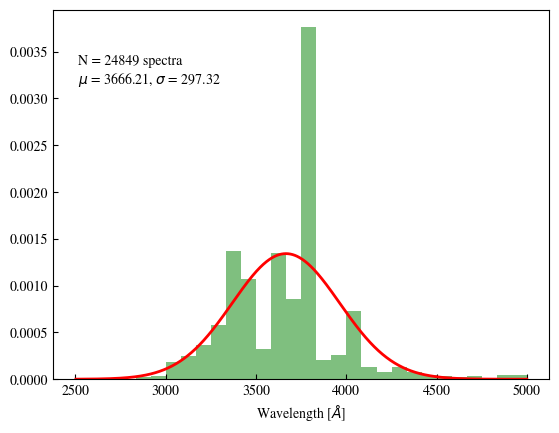

In [75]:
# Calcular los valores de la función gaussiana
x = np.linspace(masked_spectra_data.lambda_data_min.min(), masked_spectra_data.lambda_data_min.max(), 1000)
mu, sigma = masked_spectra_data.lambda_data_min.mean(), masked_spectra_data.lambda_data_min.std()

def gaussian(x, mu, sig):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Crear la figura de matplotlib
fig, ax = plt.subplots()

# Graficar el histograma de los datos originales con densidad normalizada
n, bins, patches = ax.hist(masked_spectra_data.lambda_data_min, bins=30, density=True, alpha=0.5, color='g')

# Normalizar el histograma
bin_centers = 0.5 * (bins[1:] + bins[:-1])
scale_factor = np.sum(n * np.diff(bins))
n_normalized = n / scale_factor

# Graficar la curva gaussiana normalizada
ax.plot(x, gaussian(x, mu, sigma) / scale_factor, 'r', linewidth=2)

# Etiquetas y título
#ax.set_ylabel("Densidad Normalizada")
ax.set_xlabel(r"Wavelength [$\AA$]")
#ax.set_title("Histograma y Curva Gaussiana Normalizados")

# Añadir el texto con mu y sigma
ax.text(0.05, 0.8, s='N = %d spectra'%(len(masked_spectra_data.lambda_data_min)) \
        +'\n'+r'$\mu$ = %.2f, $\sigma$ = %.2f' %(mu, sigma), transform=ax.transAxes)

# Mostrar la gráfica
plt.show()

In [5]:
spectrum = spectra_data[spectra_data.snname == 'SN2016aqw']
spectrum

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,e_flux_lambda
8,NaN,SN2016aqw,Lijiang-2.4m_YFOSC,57450.855717,3206.34,10915.01,1838,3502.681885,8861.241112,"[3.6865116e-15, 3.9416054e-15, 3.3946357000000...","[1.3266654417111276e-15, 1.2247650331208019e-1..."
9,NaN,SN2016aqw,Lijiang-2.4m_YFOSC,57450.860000,3206.34,10915.01,1838,3497.628418,9166.192170,"[6.414857e-15, 7.703079e-15, 3.6865116e-15, 3....","[1.501261220778222e-15, 1.3972311287892904e-15..."


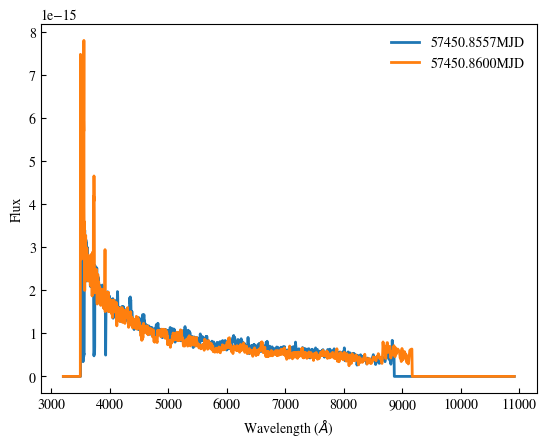

In [7]:
plot_spectra(spectrum, use_lambda_grid=True)

In [29]:
spectrum_test = spectrum.iloc[0]
spectrum_test

oid                                                              NaN
snname                                                     SN2016aqw
instrument                                        Lijiang-2.4m_YFOSC
mjd                                                     57450.855717
lambda_grid_min                                              3206.34
lambda_grid_max                                             10915.01
nlambda_grid                                                    1838
lambda_data_min                                          3502.681885
lambda_data_max                                          8861.241112
flux_lambda        [3.6865116e-15, 3.9416054e-15, 3.3946357000000...
e_flux_lambda      [1.3266654417111276e-15, 1.2247650331208019e-1...
Name: 8, dtype: object

In [30]:
wavelength_lsst = {
    'u': [3206.34, 4081.51],
    'g': [3876.02, 5665.33],
    'r': [5377.19, 7055.16],
    'i': [6765.77, 8325.05],
    'z': [8035.39, 9375.47],
    'y': [9089.07, 10915.01],
}

wavelength_ztf ={
    'g' : [3676.00, 5613.82],
    'r' : [5497.60, 7394.40],
    'i' : [6870.97, 8964.61],
}

In [31]:
def obtain_lambda_grid(df:pd.Series) -> list[float]:

    lambda_grid = np.logspace(start=np.log10(df.lambda_grid_min),
                stop=np.log10(df.lambda_grid_max),
                num=df.nlambda_grid)

    return lambda_grid

In [32]:
def interpolate_flux(df:pd.Series) -> list[float]:
    
    lambda_grid = obtain_lambda_grid(df)
    
    flux = np.array(df.flux_lambda)
    lambda_data = np.logspace(start=np.log10(df.lambda_data_min),
                stop=np.log10(df.lambda_data_max),
                num=len(flux))

    f = interpolate.interp1d(lambda_data, flux, fill_value=np.nan, bounds_error=False)
    flux_new = f(lambda_grid)

    return flux_new 


In [33]:
def simpler_intergrate(x:list[float],y:list[float]) -> float:
    
    y = np.nan_to_num(y, nan=0.0)
    
    integral = 0
    
    LSUN = const.L_sun

    for i in range(1,len(x)):
        delta_x = x[i] - x[i-1]
        integral += y[i-1] * delta_x

    return integral

In [34]:
def obtain_luminosity_condition(df:pd.Series, instrument:str):

    lambda_grid = obtain_lambda_grid(df)
    flux = interpolate_flux(df)

    luminosity_list = []

    if instrument == 'ztf':
        bandpasses = ['g','r','i']

        for bandpass in bandpasses:
            condition = np.where((wavelength_ztf[bandpass][0] < lambda_grid) & (wavelength_ztf[bandpass][1] > lambda_grid))
            x = lambda_grid[condition]
            y = flux[condition]
            luminosity = simpler_intergrate(x, y)
            luminosity_list.append(luminosity)

        return dict(zip(bandpasses, luminosity_list))
            

    elif instrument == 'lsst':
        bandpasses = ['u','g','r','i','z','y']

        for bandpass in bandpasses:
            condition = np.where((wavelength_ztf[bandpass][0] < lambda_grid) & (wavelength_ztf[bandpass][1] > lambda_grid))
            x = lambda_grid[condition]
            y = flux[condition]
            luminosity = simpler_intergrate(x, y)
            luminosity_list.append(luminosity)

        return dict(zip(bandpasses, luminosity_list))

    else:
        return print('There is not that instrument in list')

In [35]:
test = obtain_luminosity_condition(df=spectrum_test,instrument='ztf')
test

{'g': 2.4500926084201098e-12,
 'r': 1.299461211557886e-12,
 'i': 1.0093391725327336e-12}

{'g': 2.4500926084201098e-12, 'r': 1.299461211557886e-12, 'i': 1.0093391725327336e-12}
{'g': 2.3840897225157626e-12, 'r': 1.1408051984538748e-12, 'i': 1.015423357412568e-12}


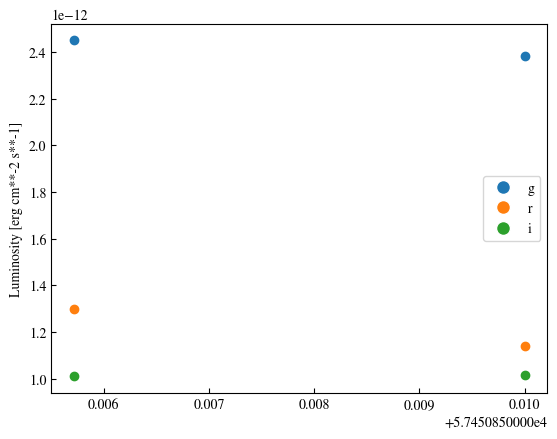

In [36]:
fig, ax = plt.subplots()
bands = ['g', 'r', 'i']
colors = ['C0', 'C1', 'C2']
for _, row in spectrum.iterrows():
    #print(row)
    luminosity_integrated = obtain_luminosity_condition(df=row, instrument='ztf')
    print(luminosity_integrated)
    for bandapass, luminosity in luminosity_integrated.items():
        ax.scatter(row.mjd,luminosity, color = colors[0] if 'g' in bandapass else colors[1] if 'r' in bandapass else colors[2])
#ax.scatter(row.mjd,luminosity,color = "green" if 'g' in bandapass else "red" if 'r' in bandapass else "blue")    
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=band)
           for band, color in zip(bands, colors)]
ax.set_ylabel('Luminosity [erg cm**-2 s**-1]')
ax.legend(handles=patches)


In [36]:
print(const.L_sun.cgs/(4*np.pi*1*u.au.to('cm')**2))

1361166.4654085755 erg / s


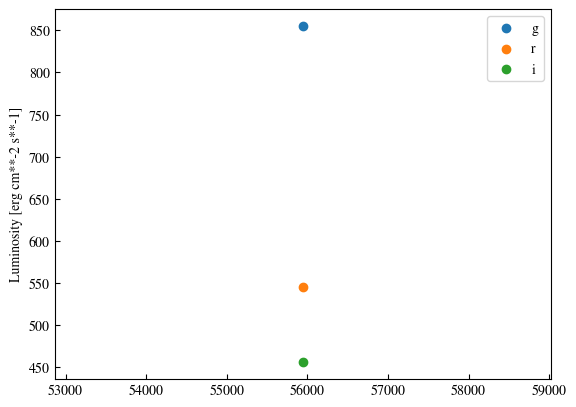

In [37]:

fig, ax = plt.subplots()
for bandapass, luminosity in test.items():
    ax.scatter(spectrum_test.mjd,luminosity,label=bandapass)
    ax.set_ylabel('Luminosity [erg cm**-2 s**-1]')
    ax.legend()

In [38]:
luminosity_g, luminosity_i = [], []

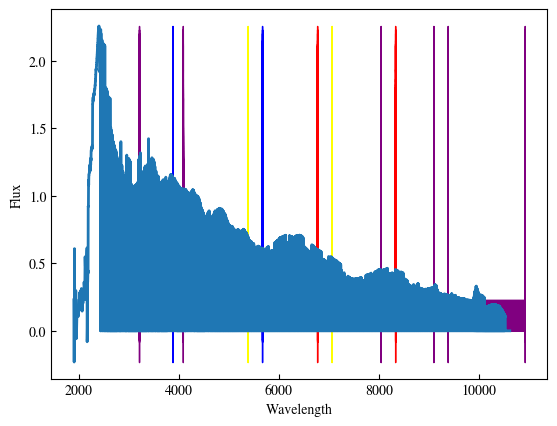

In [39]:
x = np.linspace(spectrum_test.lambda_data_min,spectrum_test.lambda_data_max, len(eval(spectrum_test.flux_lambda)))
y = eval(spectrum_test.flux_lambda)

fig, ax = plt.subplots()
#y = eval(group.flux_lambda)
ax.plot(x, np.array(y))
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength')
ax.fill_betweenx(y=y,x1=wavelength_lsst['u'][0],x2=wavelength_lsst['u'][1],color='purple')
ax.fill_betweenx(y=y,x1=wavelength_lsst['g'][0],x2=wavelength_lsst['g'][1],color='blue')
ax.fill_betweenx(y=y,x1=wavelength_lsst['r'][0],x2=wavelength_lsst['r'][1],color='yellow')
ax.fill_betweenx(y=y,x1=wavelength_lsst['i'][0],x2=wavelength_lsst['i'][1],color='red')
ax.fill_betweenx(y=y,x1=wavelength_lsst['z'][0],x2=wavelength_lsst['z'][1],color='purple')
ax.fill_betweenx(y=y,x1=wavelength_lsst['y'][0],x2=wavelength_lsst['y'][1],color='purple')

In [40]:
len(y),len(x)


(16117, 16117)

In [41]:
I = integrate.simpson(y[condicion],x[condicion])
I

NameError: name 'integrate' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
for mjd_indt, group in spectrum.groupby('mjd'):
    y = group.flux_lambda.values
    print(y)
    print(len(y))
    print(y.dtype)
    x = np.linspace(group.lambda_data_min.iloc[0],group.lambda_data_max.iloc[0], len(y))
    print(x)
    #y = eval(group.flux_lambda)
    ax.plot(x, np.array(y))
    